/home/psharma/Softwares/Anaconda/lib/python3.7/site-packages/scipy/integrate/quadpack.py:450: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagie(func,bound,infbounds,args,full_output,epsabs,epsrel,limit)
/home/psharma/Softwares/Anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:70: RuntimeWarning: invalid value encountered in double_scalars
/home/psharma/Softwares/Anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in double_scalars
/home/psharma/Softwares/Anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:113: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
/home/psharma/Softwares/Anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:120: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance fr

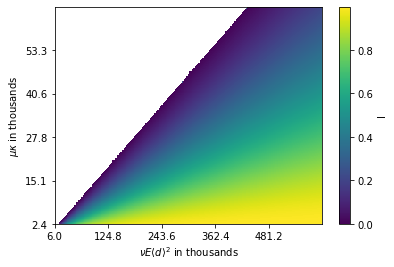

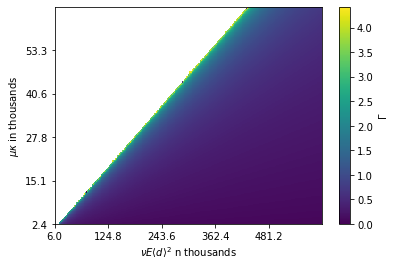

In [3]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import scipy.integrate
from scipy import optimize
import pandas as pd
import seaborn as sns
from matplotlib.ticker import MaxNLocator
import matplotlib.cm

#for plots
level_min = [2]
level_max = [12]

k = 3.1
tol1 = 1
N = 300
M = 300
zeta = 1.5
E = 3000
nu = 2
l_min = 0
l_max = 100
mu_min = 48
mu_max = 240
nmu = 192
nkappa = 800
kappa_min = 200
kappa_max = 1000
meand_min = 1
meand_max = 10
meand2_min = meand_min*meand_min
meand2_max = meand_max*meand_max
gamma_min = 0.5
gamma_max = 6
theta_min = 0.4
theta_max = 11
ntheta = 300
gammastar = 4.462500580368544
Istar = 0.125146705709152
theta = np.linspace(theta_min,theta_max,ntheta) #for system parameters
meand = np.linspace(meand_min,meand_max,M)  #average distance
l = np.linspace(l_min,l_max,N)
gamma = np.linspace(gamma_min,gamma_max,N)
mu = np.linspace(mu_min,mu_max,nmu,dtype=int)
kappa = np.linspace(kappa_min,kappa_max,nkappa,dtype=int)
meand2 = np.linspace(meand2_min,meand2_max,M)

In = np.zeros((M,N))
II = np.zeros((M,N))
Il = np.zeros((M,N))
Ill = np.zeros((M,N))
sys = np.zeros((nmu,nkappa))
y = np.zeros((N))
x = np.zeros((M))
F = np.zeros((M,N))
Isol = np.zeros((ntheta,M))
gammasol = np.zeros((ntheta,M))

# def f(x):
#     return (0.22*x*x - 2.22*x)
# for i in range(0,M):
#     meand2[i] = meand[i]*meand[i]
   

# probability density function========================================================
    
def p(x):
    if (x!=0):
        return (np.exp(-1/x)*((x)**(-3.1)))
    else:
        return 0
#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
    
# Normalisation constant================================================================    
c = scipy.integrate.quad(p,0,np.inf)[0]
#print(c)


# First derivative of probability density function======================================
def pp(x):
    if (x!=0):
        return ((x**(-k-2) - k*x**(-k-1))*np.exp(-1/x))
    else:
        return 0
#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx    

# Second Derivative of probability density function========================================    
def pp2(x):
    if (x!=0):
        return (np.exp(-1/x)*((-k-2)*x**(-k-3) + k*(k+1)*x**(-(k+2))) + pp(x)/(x*x))
    if (x==0):
        return 0
#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


#==================================================================================================
# for i in range(0,N):
#     P[i] = scipy.integrate.quad(p,zeta*gamma[i],np.inf)[0]/c
    
# plt.plot(gamma,np.log(P))
# #plt.plot(gamma,f(gamma))
# plt.grid()

#===================================================================================================


# Uncomment below for phase diagram of psi vs phi===============================================

#function we have to solve numerically================================

def func(x,d2,thet):
    frac = scipy.integrate.quad(p,zeta*x,np.inf)[0]/c
    return((frac*x*x*d2 - thet)*nu*E)
#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

#First derivative==========================================================================

def funcp(x,d2,thet):
    frac = scipy.integrate.quad(p,zeta*x,np.inf)[0]/c
    return((2*frac*x - x*x*zeta*p(zeta*x)/c)*d2*nu*E)

#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

#Second derivative============================================================================
def funcp2(x,d2,thet):
    frac = scipy.integrate.quad(p,zeta*x,np.inf)[0]/c
    return((2*frac - 4*x*zeta*p(zeta*x)/c - x*x*zeta*zeta*pp(zeta*x)/c)*d2*nu*E)

#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


for i in range(0,ntheta):
    for j in range(0,M):
        gammasol[i,j] = np.nan
        Isol[i,j] = np.nan
        lmbd = Istar*16*gammastar*meand2[j]
        if (theta[i]<lmbd):  #comp
            gsol = scipy.optimize.newton(func,x0 = np.sqrt(theta[i]/(meand2[j])),fprime=funcp,args=(meand2[j],theta[i]),tol=1e-08,maxiter=50,fprime2 = funcp2, x1 = None,rtol=0.0, full_output=False, disp=False)
            if (gsol<gammastar):
                gammasol[i,j] = gsol
                Isol[i,j] = scipy.integrate.quad(p,zeta*gsol,np.inf)[0]/c

        

        
#Plotting begins here, make any changes you want to make in the plots below:========================
        
dfIsol = pd.DataFrame(Isol,columns=meand2*nu*E,index=theta*nu*E)
plt.pcolor(dfIsol,cmap='viridis',vmin = 0)
plt.yticks(np.arange(0, len(dfIsol.index), int(len(dfIsol.index)/5)), np.around(np.arange(theta_min*nu*E/1000,theta_max*nu*E/1000,(theta_max*nu*E/1000-theta_min*nu*E/1000)*int(len(dfIsol.index)/5)/ntheta),1))
plt.xticks(np.arange(0, len(dfIsol.columns), int(len(dfIsol.columns)/5)), np.around(np.arange(meand2_min*nu*E/1000,meand2_max*nu*E/1000,(meand2_max*nu*E/1000-meand2_min*nu*E/1000)*int(len(dfIsol.columns)/5)/M),1))
plt.ylabel(r"$\mu \kappa$ in thousands")
plt.xlabel(r"$\nu E \langle d \rangle^2$ in thousands")
#plt.title(r"$I$")
#plt.colorbar()
#plt.contour(II,colors="green",levels=level_min)
cbar = plt.colorbar()
cbar.set_label('I',rotation=90)
current_cmap = matplotlib.cm.get_cmap()
current_cmap.set_bad(color='white')
plt.savefig('Isol_psi_phi_30c.pdf')
plt.show()

dfgammasol = pd.DataFrame(gammasol,columns=meand,index=theta)
plt.pcolor(dfgammasol,cmap='viridis', vmin = 0)
plt.yticks(np.arange(0, len(dfgammasol.index), int(len(dfgammasol.index)/5)), np.around(np.arange(theta_min*nu*E/1000,theta_max*nu*E/1000,(theta_max*nu*E/1000-theta_min*nu*E/1000)*int(len(dfgammasol.index)/5)/ntheta),1))
plt.xticks(np.arange(0, len(dfgammasol.columns), int(len(dfgammasol.columns)/5)), np.around(np.arange(meand2_min*nu*E/1000,meand2_max*nu*E/1000,(meand2_max*nu*E/1000-meand2_min*nu*E/1000)*int(len(dfgammasol.columns)/5)/M),1))
plt.ylabel(r"$\mu \kappa$ in thousands")
plt.xlabel(r"$\nu E \langle d \rangle^2$ n thousands")
#plt.title(r"$\Gamma$")
#plt.colorbar()
#plt.contour(II,colors="green",levels=level_min)
cbar = plt.colorbar()
cbar.set_label(r'$\Gamma$')
current_cmap = matplotlib.cm.get_cmap()
current_cmap.set_bad(color='white')
plt.savefig('gammasol_psi_phi_30c.pdf')
plt.show()

#===================================================================================================

# Uncomment below for phase diagram of theta vs d-----------------------------------------------------------

# def func(x,d,thet):
#     frac = scipy.integrate.quad(p,zeta*x,np.inf)[0]/c
#     return((frac*x*x*d*d - thet))

# def funcp(x,d,thet):
#     frac = scipy.integrate.quad(p,zeta*x,np.inf)[0]/c
#     return((2*frac*x - x*x*zeta*p(zeta*x)/c)*d*d)

# def funcp2(x,d,thet):
#     frac = scipy.integrate.quad(p,zeta*x,np.inf)[0]/c
#     return((2*frac - 4*x*zeta*p(zeta*x)/c - x*x*zeta*zeta*pp(zeta*x)/c)*d*d)


# for i in range(0,ntheta):
#     for j in range(0,M):
# #         avg = meand[j]
# #         norm = scipy.integrate.quad(f,0,np.inf)[0]
# #         for k in range(0,N):
# #             if (np.absolute(theta[i]-II[j,k])<=tol1):
# #                 Isol[i,j] = In[j,k]
# #                 gammasol[i,j] = gamma[k]
#         gsol = scipy.optimize.newton(func,x0 = np.sqrt(theta[i]/(meand[j]**2)),fprime=funcp,args=(meand[j],theta[i]),tol=1e-08,maxiter=50,fprime2 = funcp2, x1 = None,rtol=0.0, full_output=False, disp=False)
#         if (gsol<=4):
#             gammasol[i,j] = gsol
#             Isol[i,j] = scipy.integrate.quad(p,zeta*gammasol[i,j],np.inf)[0]/c
#         else:
#             gammasol[i,j] = -99
#             Isol[i,j] = -99
        
        
        
# dfIsol = pd.DataFrame(Isol,columns=meand,index=theta)
# plt.pcolor(dfIsol,cmap='viridis',vmin = 0)
# plt.yticks(np.arange(0, len(dfIsol.index), int(len(dfIsol.index)/15)), np.around(np.arange(theta_min,theta_max,(theta_max-theta_min)*int(len(dfIsol.index)/15)/ntheta),1))
# plt.xticks(np.arange(0, len(dfIsol.columns), int(len(dfIsol.columns)/15)), np.around(np.arange(meand_min,meand_max,(meand_max-meand_min)*int(len(dfIsol.columns)/15)/M),1))
# plt.ylabel(r"$\frac{\mu \kappa}{\nu E}$")
# plt.xlabel(r"$\langle d \rangle$")
# plt.title(r"$I$")
# plt.colorbar()
# #plt.contour(II,colors="green",levels=level_min)
# plt.savefig('Isol2.png')
# plt.show()

# dfgammasol = pd.DataFrame(gammasol,columns=meand,index=theta)
# plt.pcolor(dfgammasol,cmap='viridis', vmin = 0)
# plt.yticks(np.arange(0, len(dfgammasol.index), int(len(dfgammasol.index)/15)), np.around(np.arange(theta_min,theta_max,(theta_max-theta_min)*int(len(dfgammasol.index)/15)/ntheta),1))
# plt.xticks(np.arange(0, len(dfgammasol.columns), int(len(dfgammasol.columns)/15)), np.around(np.arange(meand_min,meand_max,(meand_max-meand_min)*int(len(dfgammasol.columns)/15)/M),1))
# plt.ylabel(r"$\frac{\mu \kappa}{\nu E}$")
# plt.xlabel(r"$\langle d \rangle$")
# plt.title(r"$\Gamma$")
# plt.colorbar()
# #plt.contour(II,colors="green",levels=level_min)
# plt.savefig('gammasol2.png')
# plt.show()


# for gamma star=========================================================

# def gammasp(x):
#     if (x!=0):
#         return (-3*zeta*p(zeta*x)-zeta*zeta*x*pp(zeta*x))/c
#     else:
#         return 0

# def gammasp2(x):
#     if (x!=0):
#         return (-4*zeta*zeta*pp(zeta*x)-zeta*zeta*x*pp2(zeta*x))/c
#     else:
#         return 0

# def gammas(x):
#     if (x!=0):
#         frac = scipy.integrate.quad(p,zeta*x,np.inf)[0]/c
#         return (2*frac - zeta*x*p(zeta*x)/c)
#     else:
#         return 0


# gstar = scipy.optimize.newton(gammas,x0 = 2.0,fprime=gammasp,tol=1e-08,maxiter=50,fprime2 = gammasp2, x1 = None,rtol=0.0, full_output=False, disp=False)
# print(gstar)
# print(scipy.integrate.quad(p,zeta*1,np.inf)[0]/c)

#==========================================================================